In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import pandas as pd
import numpy.ma as ma

In [2]:
# import NCL colormap
! pip install cmaps
import cmaps

### get data

In [15]:
folr=xr.open_dataset('/Users/dongxiay/Documents/data/ERA5_OLR_1959-2014_1deg.nc')
ds=folr['mtnlwrf'][:,::-1,:]
ds = ds.roll(longitude=(ds.sizes['longitude'] // 2), roll_coords=True)
ds['longitude'] = (ds.longitude + 360) % 360
ds

<xarray.DataArray 'mtnlwrf' (time: 20454, latitude: 180, longitude: 360)>
array([[[-184.35526, -184.3436 , -184.33194, ..., -184.39502,
         -184.38168, -184.36795],
        [-185.4327 , -185.35153, -185.2696 , ..., -185.57175,
         -185.5293 , -185.48859],
        [-186.70132, -186.6162 , -186.52344, ..., -186.75337,
         -186.74377, -186.73816],
        ...,
        [-164.37943, -164.48962, -164.59395, ..., -164.12749,
         -164.203  , -164.28258],
        [-162.88713, -162.94424, -163.0011 , ..., -162.76637,
         -162.80457, -162.8422 ],
        [-161.64981, -161.67311, -161.69592, ..., -161.62355,
         -161.63036, -161.63669]],

       [[-183.96054, -183.96663, -183.97275, ..., -183.94055,
         -183.94748, -183.9546 ],
        [-184.57863, -184.54836, -184.5185 , ..., -184.64864,
         -184.62585, -184.60352],
        [-185.5214 , -185.48392, -185.44249, ..., -185.62253,
         -185.58969, -185.55855],
...
        [-166.70398, -166.72891, -166.75702, ..., -166.65353,
         -166.66475, -166.68053],
        [-167.5576 , -167.61345, -167.67007, ..., -167.48189,
         -167.5023 , -167.52324],
        [-167.28314, -167.30057, -167.31778, ..., -167.23622,
         -167.2513 , -167.2663 ]],

       [[-184.17569, -184.1744 , -184.17305, ..., -184.20683,
         -184.19539, -184.18352],
        [-185.00879, -184.96376, -184.9182 , ..., -185.15582,
         -185.10658, -185.05669],
        [-185.91895, -185.86353, -185.80383, ..., -186.11256,
         -186.04486, -185.98003],
        ...,
        [-170.8919 , -171.15666, -171.41292, ..., -170.0387 ,
         -170.31155, -170.60474],
        [-170.80742, -170.88971, -170.97252, ..., -170.60506,
         -170.67029, -170.73575],
        [-170.6529 , -170.66876, -170.68517, ..., -170.61923,
         -170.62961, -170.6405 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.375 1.375 2.375 3.375 ... 357.4 358.4 359.4
  * latitude   (latitude) float32 -89.38 -88.38 -87.38 ... 87.62 88.62 89.62
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 2014-12-31
Attributes:
    units:      W m**-2
    long_name:  Mean top net long-wave radiation flux

#### seasonal anomaly

In [16]:
%%time 
sea_mean=ds.loc[:,-24:20,:].groupby('time.season').mean('time')
sea_ano=ds.loc[:,-24:20,:].groupby('time.season')-sea_mean
sea_ano

CPU times: user 3.43 s, sys: 5.46 s, total: 8.89 s
Wall time: 14 s


<xarray.DataArray 'mtnlwrf' (time: 20454, latitude: 44, longitude: 360)>
array([[[ -7.4515686 ,  -6.136078  ,  -5.82901   , ...,  -7.518463  ,
          -6.646637  ,  -7.8189087 ],
        [ -4.6525574 ,  -3.7834778 ,  -4.3607483 , ...,  -6.53125   ,
          -6.921356  ,  -6.4048767 ],
        [ -6.202942  ,  -5.9528503 ,  -8.293121  , ...,  -8.423553  ,
          -7.015167  ,  -5.2405396 ],
        ...,
        [  4.5980225 ,  14.48587   ,  21.12004   , ..., -20.656555  ,
         -14.49234   ,  -5.7618713 ],
        [-11.262085  ,   0.14968872,  13.36853   , ..., -25.494232  ,
         -24.18393   , -19.425293  ],
        [-21.79367   , -18.191498  ,  -8.648102  , ..., -24.58017   ,
         -24.359192  , -23.87558   ]],

       [[ -6.3339844 ,  -6.9436035 ,  -8.076447  , ...,  -7.838928  ,
          -6.7955933 ,  -6.4235535 ],
        [ -5.8158264 ,  -6.1740723 ,  -6.3809814 , ...,  -9.016541  ,
          -8.013611  ,  -6.4515686 ],
        [ -6.8719788 ,  -6.659088  ,  -6.1040344 , ...,  -9.3697815 ,
          -7.944702  ,  -7.163574  ],
...
        [-15.192657  , -15.85144   , -14.855652  , ...,  -6.779236  ,
         -10.528809  , -13.771515  ],
        [-14.060516  , -15.4062805 , -15.347748  , ..., -12.982361  ,
         -13.691711  , -14.325073  ],
        [-15.922394  , -15.27832   , -15.571594  , ..., -14.986298  ,
         -15.927856  , -16.579956  ]],

       [[ -6.769562  ,  -7.507141  ,  -7.2507324 , ...,  -6.5509033 ,
          -6.372528  ,  -6.5717773 ],
        [ -4.4652405 ,  -4.0933533 ,  -4.1998596 , ...,  -5.2802734 ,
          -4.720337  ,  -4.7874756 ],
        [ -2.1669617 ,  -2.1747742 ,  -2.6663818 , ...,  -3.7062683 ,
          -3.3711853 ,  -2.4030762 ],
        ...,
        [ 18.170532  ,  13.833954  ,  10.824768  , ...,  28.105713  ,
          29.306076  ,  25.592834  ],
        [ 19.475311  ,  16.006378  ,  12.442505  , ...,  13.60762   ,
          16.156097  ,  19.983917  ],
        [ 10.958801  ,   9.782776  ,   6.828949  , ...,  12.524994  ,
           9.412201  ,   9.855103  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.375 1.375 2.375 3.375 ... 357.4 358.4 359.4
  * latitude   (latitude) float32 -23.38 -22.38 -21.38 ... 17.62 18.62 19.62
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 2014-12-31
    season     (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'

### install w-k filter package and filter the OLR 

In [17]:
import wheeler_kiladis_mjo_filter
import mjoindices.olr_handling as olr

In [18]:
%%time 
sea_ano_orl = olr.OLRData(np.nan_to_num(sea_ano.to_numpy()),
                          sea_ano['time'].to_numpy(),
                          sea_ano['latitude'].to_numpy(),
                          sea_ano['longitude'].to_numpy())
aa=wheeler_kiladis_mjo_filter.filter_olr_temporally_and_longitudinally(sea_ano_orl, 30., 96., 0., 2160, do_plot=False)

Smooth data temporally and longitudinally...
Filtering for latitude:  -23.375
Filtering for latitude:  -22.375
Filtering for latitude:  -21.375
Filtering for latitude:  -20.375
Filtering for latitude:  -19.375
Filtering for latitude:  -18.375
Filtering for latitude:  -17.375
Filtering for latitude:  -16.375
Filtering for latitude:  -15.375
Filtering for latitude:  -14.375
Filtering for latitude:  -13.375
Filtering for latitude:  -12.375
Filtering for latitude:  -11.375
Filtering for latitude:  -10.375
Filtering for latitude:  -9.375
Filtering for latitude:  -8.375
Filtering for latitude:  -7.375
Filtering for latitude:  -6.375
Filtering for latitude:  -5.375
Filtering for latitude:  -4.375
Filtering for latitude:  -3.375
Filtering for latitude:  -2.375
Filtering for latitude:  -1.375
Filtering for latitude:  -0.375
Filtering for latitude:  0.625
Filtering for latitude:  1.625
Filtering for latitude:  2.625
Filtering for latitude:  3.625
Filtering for latitude:  4.625
Filtering for lati

In [24]:
latitude=sea_ano['latitude']
longitude=sea_ano['longitude']
time=sea_ano['time']

In [26]:
flt_olr = xr.DataArray(aa._olr, 
coords={'time': time,'latitude': latitude,'longitude': longitude}, 
dims=["time", "latitude","longitude"])

In [27]:
flt_olr.to_netcdf('WKfiltered_MJOOLR_3096d_1-4wave_1959-2014.nc')

In [29]:
folr=xr.open_dataset('/Users/dongxiay/Documents/MJO/WKfiltered_MJOOLR_3096d_1-4wave_1959-2014.nc')
flt_olr=folr['__xarray_dataarray_variable__']
flt_olr

<xarray.DataArray '__xarray_dataarray_variable__' (time: 20454, latitude: 44, longitude: 360)>
[323991360 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 2014-12-31
  * latitude   (latitude) float32 -23.38 -22.38 -21.38 ... 17.62 18.62 19.62
  * longitude  (longitude) float32 0.375 1.375 2.375 3.375 ... 357.4 358.4 359.4

In [30]:
# define the colormap
cmap = plt.get_cmap('bwr')
cmaplist = [cmap(i) for i in range(cmap.N)]
x=8
n=int(cmap.N/2/x)
new_list = cmaplist[1::n]
new_list = new_list[:x] + [(1,1,1,1),(1,1,1,1)] + new_list[x:]
# create the new map
cmap2 = cmap.from_list('Custom cmap', new_list, n*2+2)
# new_list  

In [44]:
# OLR anomaly
#data0=sea_ano.loc['1982-10-05':'1983-05-29',:,:]
data0=sea_ano.loc['1997-11-02':'1998-05-02',:,:]
weights = np.cos(np.deg2rad(data0.latitude.values))
avg_data0 = (data0 * weights[None, :, None]).sum(dim='latitude') / np.sum(weights)

# OLR MJO filtered
#data=flt_olr.loc['1982-10-05':'1983-05-29',:,:]
data=flt_olr.loc['1997-11-02':'1998-05-02',:,:]
# Compute weights and take weighted average over latitude dimension
weights = np.cos(np.deg2rad(data.latitude.values))
avg_data = (data * weights[None, :, None]).sum(dim='latitude') / np.sum(weights)

# Get times and make array of datetime objects
vtimes = data.time.values.astype('datetime64[D]').astype('O')

# Specify longitude values for chosen domain
lons = data.longitude.values

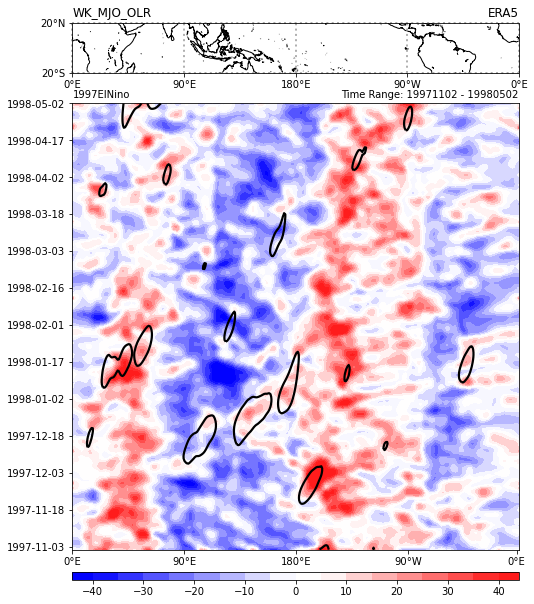

In [45]:
# Start figure
fig = plt.figure(figsize=(8, 12))

# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 6], hspace=0.03)

# Tick labels
x_tick_labels = [u'0\N{DEGREE SIGN}E', u'90\N{DEGREE SIGN}E',
                 u'180\N{DEGREE SIGN}E', u'90\N{DEGREE SIGN}W',
                 u'0\N{DEGREE SIGN}E']

# Top plot for geographic reference (makes small map)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([0,357.5, -20, 20], ccrs.PlateCarree(central_longitude=180))
ax1.set_yticks([-20, 20])
ax1.set_yticklabels([u'20\N{DEGREE SIGN}S', u'20\N{DEGREE SIGN}N'])
ax1.set_xticks([-180, -90, 0, 90, 180])
ax1.set_xticklabels(x_tick_labels)
ax1.grid(linestyle='dotted', linewidth=2)

# Add geopolitical boundaries for map reference
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax1.add_feature(cfeature.LAKES.with_scale('50m'), color='black', linewidths=0.5)

# Set some titles
plt.title('WK_MJO_OLR', loc='left')
plt.title('ERA5', loc='right')

# Bottom plot for Hovmoller diagram
ax2 = fig.add_subplot(gs[1, 0])
# ax2.invert_yaxis()  # Reverse the time order to do oldest first

# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = [8,16]
clevf =np.arange(-40,45,5)
cf = ax2.contourf(lons, vtimes, mpcalc.smooth_n_point(
    avg_data0, 9, 2), 
                     clevf,
                   cmap=cmap2,
#                   cmap=tmap,
                  extend='both')
cs = ax2.contour(lons, vtimes, mpcalc.smooth_n_point(
    avg_data, 9, 2), 
                   clevs,
                 colors='k', linewidths=2.2)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
#cbar.set_label('m $s^{-1}$')

# Make some ticks and tick labels
ax2.set_xticks([0, 90, 180, 270, 357.5])
ax2.set_xticklabels(x_tick_labels)
ax2.set_yticks(vtimes[1::15])
ax2.set_yticklabels(vtimes[1::15])

# Set some titles
plt.title('1997ElNino', loc='left', fontsize=10)
plt.title('Time Range: {0:%Y%m%d} - {1:%Y%m%d}'.format(vtimes[0], vtimes[-1]),
          loc='right', fontsize=10)

plt.show()

In [46]:
# OLR anomaly
#data0=sea_ano.loc['1999-09-13':'2000-05-22',:,:]  
data0=sea_ano.loc['2007-11-19':'2008-05-02',:,:]  
weights = np.cos(np.deg2rad(data0.latitude.values))
avg_data0 = (data0 * weights[None, :, None]).sum(dim='latitude') / np.sum(weights)

# OLR MJO filtered
#data=flt_olr.loc['1999-09-13':'2000-05-22',:,:]  
data=flt_olr.loc['2007-11-19':'2008-05-02',:,:] 
# Compute weights and take weighted average over latitude dimension
weights = np.cos(np.deg2rad(data.latitude.values))
avg_data = (data * weights[None, :, None]).sum(dim='latitude') / np.sum(weights)

# Get times and make array of datetime objects
vtimes = data.time.values.astype('datetime64[D]').astype('O')

# Specify longitude values for chosen domain
lons = data.longitude.values

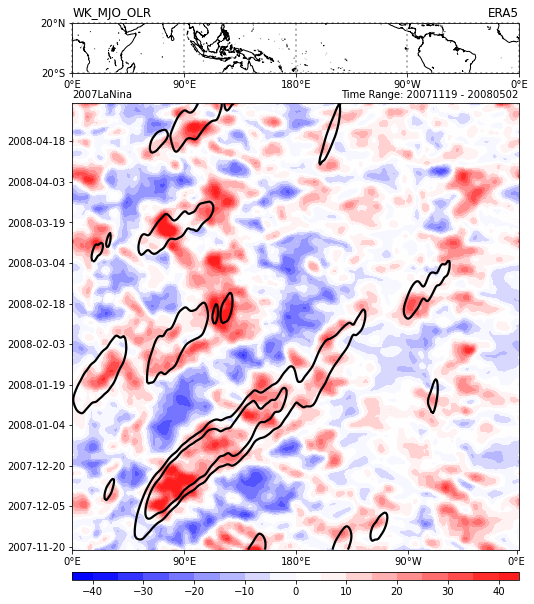

In [47]:
# Start figure
fig = plt.figure(figsize=(8, 12))

# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 6], hspace=0.03)

# Tick labels
x_tick_labels = [u'0\N{DEGREE SIGN}E', u'90\N{DEGREE SIGN}E',
                 u'180\N{DEGREE SIGN}E', u'90\N{DEGREE SIGN}W',
                 u'0\N{DEGREE SIGN}E']

# Top plot for geographic reference (makes small map)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([0,357.5, -20, 20], ccrs.PlateCarree(central_longitude=180))
ax1.set_yticks([-20, 20])
ax1.set_yticklabels([u'20\N{DEGREE SIGN}S', u'20\N{DEGREE SIGN}N'])
ax1.set_xticks([-180, -90, 0, 90, 180])
ax1.set_xticklabels(x_tick_labels)
ax1.grid(linestyle='dotted', linewidth=2)

# Add geopolitical boundaries for map reference
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax1.add_feature(cfeature.LAKES.with_scale('50m'), color='black', linewidths=0.5)

# Set some titles
plt.title('WK_MJO_OLR', loc='left')
plt.title('ERA5', loc='right')

# Bottom plot for Hovmoller diagram
ax2 = fig.add_subplot(gs[1, 0])
# ax2.invert_yaxis()  # Reverse the time order to do oldest first

# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = [8,16]
fclevs = np.arange(-40,45,5)
cf = ax2.contourf(lons, vtimes, mpcalc.smooth_n_point(
    avg_data0, 9, 2), 
                   fclevs,
#                    cmap=plt.cm.bwr,
                   cmap=cmap2,
                  extend='both')
cs = ax2.contour(lons, vtimes, mpcalc.smooth_n_point(
    avg_data, 9, 2), 
                   clevs,
                 colors='k', linewidths=2.2)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
#cbar.set_label('m $s^{-1}$')

# Make some ticks and tick labels
ax2.set_xticks([0, 90, 180, 270, 357.5])
ax2.set_xticklabels(x_tick_labels)
ax2.set_yticks(vtimes[1::15])
ax2.set_yticklabels(vtimes[1::15])

# Set some titles
plt.title('2007LaNina', loc='left', fontsize=10)
plt.title('Time Range: {0:%Y%m%d} - {1:%Y%m%d}'.format(vtimes[0], vtimes[-1]),
          loc='right', fontsize=10)

plt.show()